In [21]:
import numpy as np
import matplotlib.pyplot as plt

KeysView(NpzFile '/Users/osama/GP-2025-Strain/Code/Wave/displaced_images/displaced_images.npz' with keys: arr_0, arr_1, arr_2, arr_3, arr_4...)


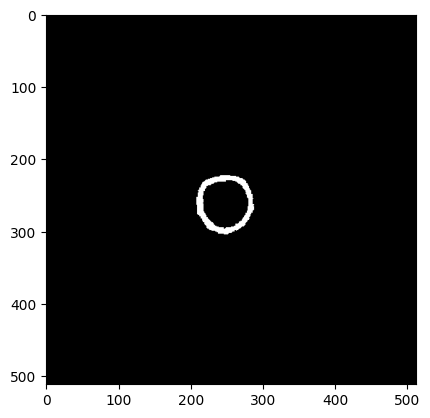

In [ ]:
displacement_masks = np.load('/Users/osama/GP-2025-Strain/Code/Wave/displaced_images/displaced_images.npz')
print(displacement_masks.keys())
# get the displacement mask
i=17
displacement_mask = displacement_masks[f'arr_{i}']

displacement_mask = np.where(displacement_mask > 0, 255, 0)
#plot the displacement mask
plt.imshow(displacement_mask)
plt.show()

In [23]:
#print unique values in the displacement mask
print(np.unique(displacement_mask))

#print all the values stored in the displacement mask with its frequency
unique, counts = np.unique(displacement_mask, return_counts=True)
print(np.asarray((unique, counts)).T)


[  0 255]
[[     0 780879]
 [   255   5553]]


In [24]:
print(displacement_mask.shape)

(512, 512, 3)


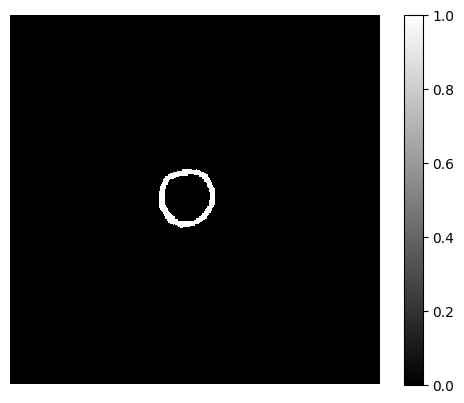

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Load the npz file
data= displacement_masks

# Extract all frames from the npz file
frames = [data[key] for key in data.files]

# Normalize frames to binary (0 and 1) and scale for visibility
frames = [(frame > 0).astype(int) * 255 for frame in frames]


# Set up the figure and axis
fig, ax = plt.subplots()
img = ax.imshow(frames[0], cmap='gray', interpolation='none', vmin=0, vmax=1)
cbar = fig.colorbar(img, ax=ax, orientation='vertical')
# Remove axes for better visualization
ax.axis('off')

# Function to update the animation
def update(frame_index):    
    img.set_array(frames[frame_index])
    return [img]

# Create the animation
ani = FuncAnimation(fig, update, frames=len(frames), interval=100, blit=True)

# Embed animation in the notebook
HTML(ani.to_jshtml())


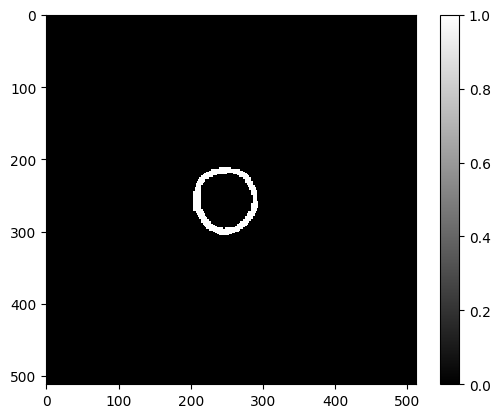

In [38]:
frames = [frame * 255 for frame in frames]  # Scale `1` values to maximum brightness
plt.imshow(frames[0], cmap='gray', interpolation='none', vmin=0, vmax=1)
plt.colorbar()
plt.show()


In [ ]:
frames = [frame * 255 for frame in frames]  # Scale `1` values to maximum brightness
# img = ax.imshow(frames[0], cmap='gray', interpolation='none', vmin=0, vmax=255)
